# Exercise 5.22

In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Math
from scipy import stats
from chapter_5_utils import my_q_q_plot, bonferroni_conf_int, simult_conf_int

In [2]:
def load_data() -> pd.DataFrame:
    # Load the milk transportation cost data.
    fpath = pathlib.WindowsPath(r'..\..\data\Table5.13.xlsx')
    return pd.read_excel(fpath)

In [3]:
milk_df = load_data()
milk_df.head(3)

,Fuel,Repair,Capital
0,16.44,12.43,11.23
1,7.19,2.70,3.92
2,9.92,1.35,9.75


## (a)

In [4]:
X = milk_df.to_numpy()
n, p = X.shape

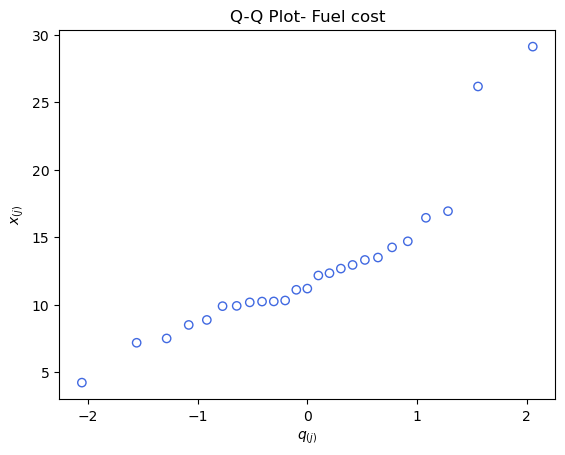

In [5]:
my_q_q_plot(X[:,0])
ax = plt.gca()
plt.title('Q-Q Plot- Fuel cost')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-22-a-QQ-Fuel.png')
plt.show()

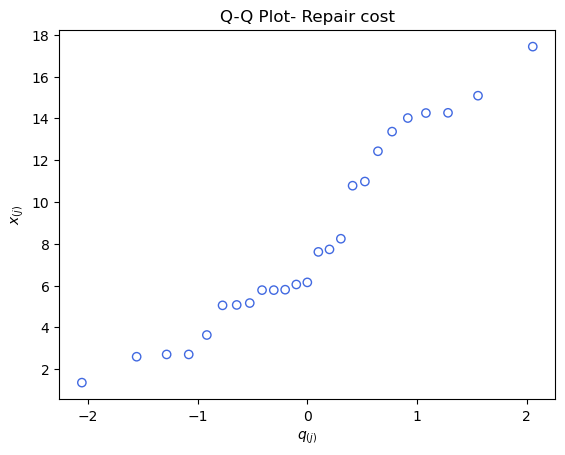

In [6]:
my_q_q_plot(X[:,1])
ax = plt.gca()
plt.title('Q-Q Plot- Repair cost')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-22-a-QQ-Repair.png')
plt.show()

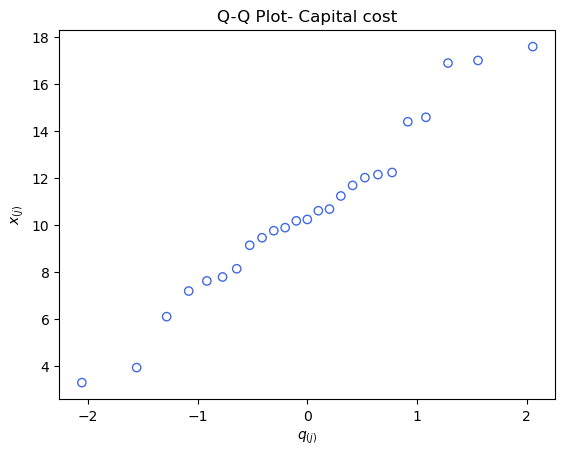

In [7]:
my_q_q_plot(X[:,2])
ax = plt.gca()
plt.title('Q-Q Plot- Capital cost')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-22-a-QQ-Capital.png')
plt.show()

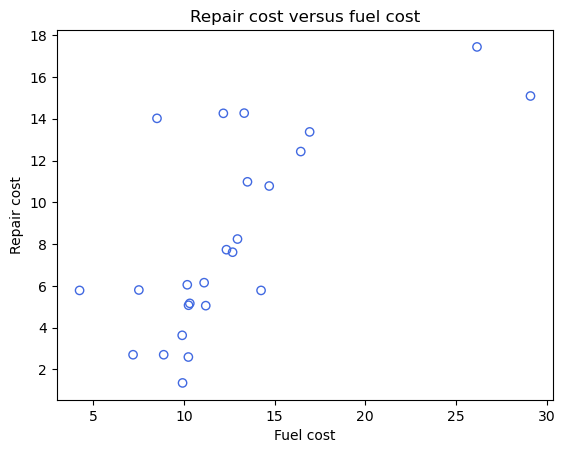

In [8]:
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='royalblue')
plt.xlabel('Fuel cost')
plt.ylabel('Repair cost')
plt.title('Repair cost versus fuel cost')
plt.savefig('Question-5-22-a-xy-FuelRepair.png')
plt.show()

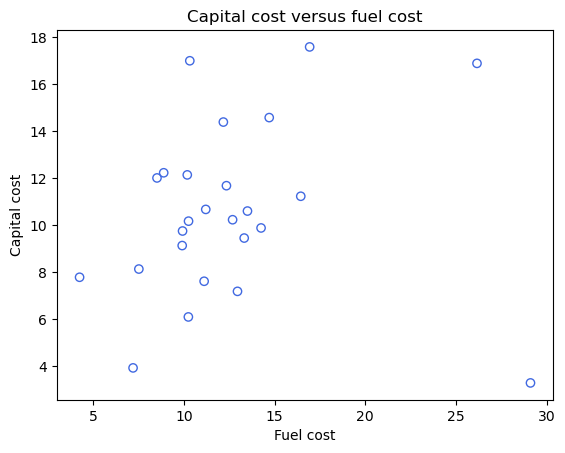

In [9]:
plt.scatter(X[:, 0], X[:, 2], facecolors='none', edgecolors='royalblue')
plt.xlabel('Fuel cost')
plt.ylabel('Capital cost')
plt.title('Capital cost versus fuel cost')
plt.savefig('Question-5-22-a-xy-FuelCapital.png')
plt.show()

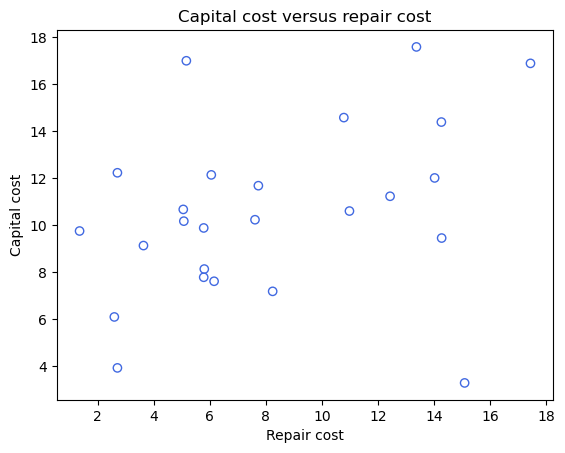

In [10]:
plt.scatter(X[:, 1], X[:, 2], facecolors='none', edgecolors='royalblue')
plt.xlabel('Repair cost')
plt.ylabel('Capital cost')
plt.title('Capital cost versus repair cost')
plt.savefig('Question-5-22-a-xy-RepairCapital.png')
plt.show()

In [11]:
# Remove the two outliers.
outies = np.argpartition(X[:,0], -2)[-2:]
X_del = np.delete(X, outies, 0)

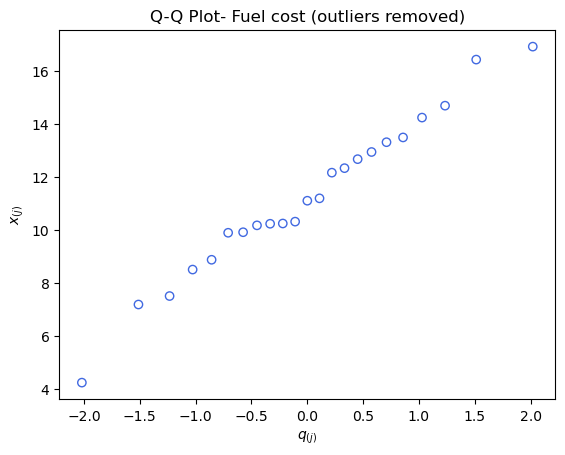

In [12]:
my_q_q_plot(X_del[:,0])
ax = plt.gca()
plt.title('Q-Q Plot- Fuel cost (outliers removed)')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-22-a-QQ-Fuel-del.png')
plt.show()

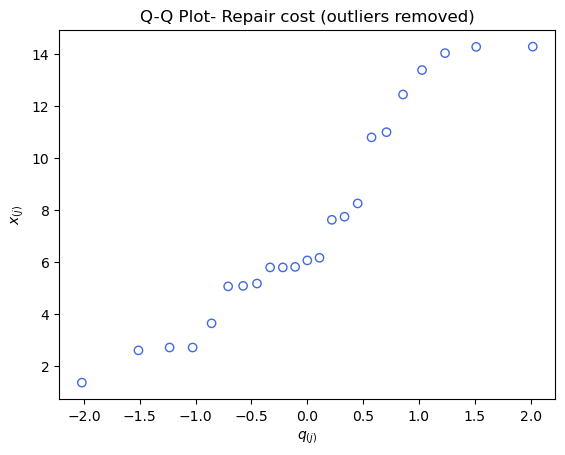

In [13]:
my_q_q_plot(X_del[:,1])
ax = plt.gca()
plt.title('Q-Q Plot- Repair cost (outliers removed)')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-22-a-QQ-Repair-del.png')
plt.show()

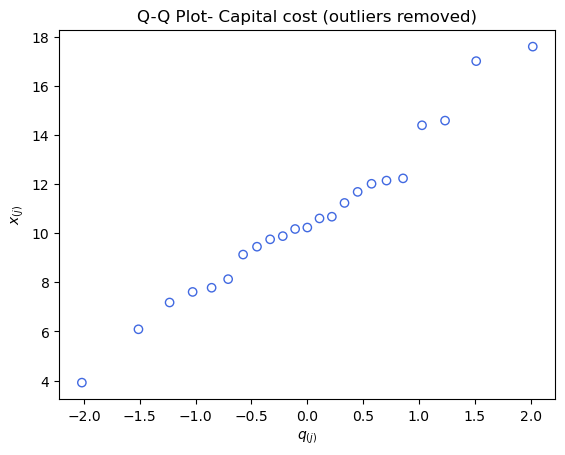

In [14]:
my_q_q_plot(X_del[:,2])
ax = plt.gca()
plt.title('Q-Q Plot- Capital cost (outliers removed)')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Question-5-22-a-QQ-Capital-del.png')
plt.show()

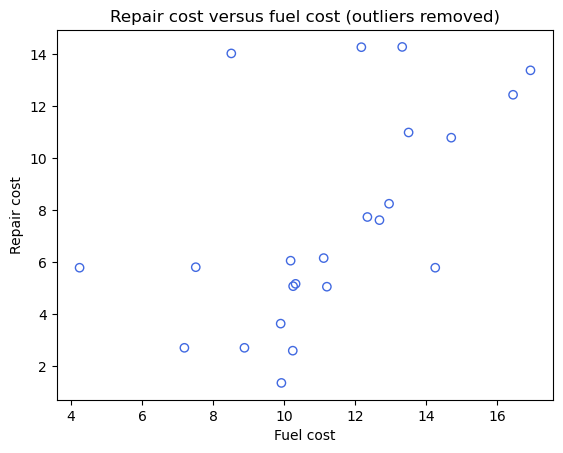

In [15]:
plt.scatter(X_del[:, 0], X_del[:, 1], facecolors='none', edgecolors='royalblue')
plt.xlabel('Fuel cost')
plt.ylabel('Repair cost')
plt.title('Repair cost versus fuel cost (outliers removed)')
plt.savefig('Question-5-22-a-xy-FuelRepair-del.png')
plt.show()

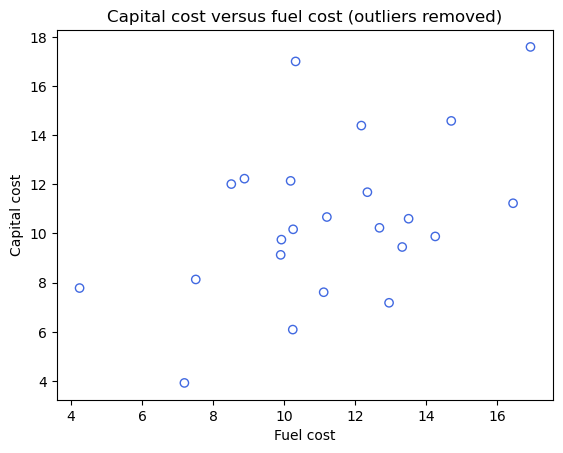

In [16]:
plt.scatter(X_del[:, 0], X_del[:, 2], facecolors='none', edgecolors='royalblue')
plt.xlabel('Fuel cost')
plt.ylabel('Capital cost')
plt.title('Capital cost versus fuel cost (outliers removed)')
plt.savefig('Question-5-22-a-xy-FuelCapital-del.png')
plt.show()

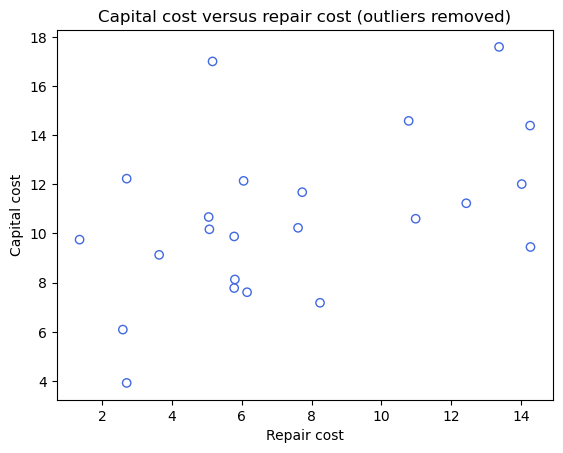

In [17]:
plt.scatter(X_del[:, 1], X_del[:, 2], facecolors='none', edgecolors='royalblue')
plt.xlabel('Repair cost')
plt.ylabel('Capital cost')
plt.title('Capital cost versus repair cost (outliers removed)')
plt.savefig('Question-5-22-a-xy-RepairCapital-del.png')
plt.show()

## (b)

## The 95% $T^{2}$ simultaneous confidence intervals:

$$
\bar{x}_{i}
\pm
\sqrt{
    \frac{(n-1)p}{(n-p)}
    F_{p, n-p}\left(\alpha\right)
}
\sqrt{
    \frac{s_{ii}}{n}
}
$$

In [18]:
xbar = np.mean(X, axis=0).reshape(p, 1)
S = np.cov(X, rowvar=False)
alpha = 0.05
f_crit = stats.f.ppf(1 - alpha, p, n-p)
const = ((n-1)*p)/(n-p)

In [19]:
xbar

array([[12.56  ],
       [ 8.1612],
       [10.5444]])

In [20]:
S

array([[28.965925  , 17.21535833,  2.69456667],
       [17.21535833, 21.45285267,  6.04452783],
       [ 2.69456667,  6.04452783, 13.59904233]])

In [21]:
# Computed by-hand as a check.
# xbar + np.array([-1, 1]) * np.sqrt(const*f_crit) * np.sqrt(np.diag(S).reshape(p, 1)/n)

In [22]:
simult_ci = simult_conf_int(X, alpha=alpha, p=p)
simult_ci

array([[ 9.15970797, 15.96029203],
       [ 5.23492564, 11.08747436],
       [ 8.21455687, 12.87424313]])

In [23]:
for i in range(simult_ci.shape[0]):
    display(Math(fr'{xbar[i,0]:.2f} \pm \sqrt{{{const*f_crit:.2f}}} '\
                 fr'\frac{{\sqrt{{{S[i,i]:.2f}}}}}{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{simult_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {simult_ci[i,1]:.2f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## The 95% Bonferroni confidence intervals:

$$
\bar{x}_{i}
\pm
t_{n-1}
\left(\frac{\alpha}{2m}\right)
\sqrt{
    \frac{
            s_{ii}
        }{
            n
        }
    }

In [24]:
m = p
t_crit = stats.t.ppf(1 - alpha/(2*m), n-1)

In [25]:
# Computed by-hand as a check.
# xbar + np.array([-1, 1]) * t_crit * np.sqrt(np.diag(S).reshape(p, 1)/n)

In [26]:
bonfer_ci = bonferroni_conf_int(X, alpha=alpha, m=m)
bonfer_ci

array([[ 9.78973276, 15.33026724],
       [ 5.77712184, 10.54527816],
       [ 8.64624301, 12.44255699]])

In [27]:
print(f'Bonferroni confidence intervals for the {p} mean lengths')
for i in range(bonfer_ci.shape[0]):
    display(Math(fr'{xbar[i,0]:.2f} \pm {t_crit:.2f} \frac{{\sqrt{{{S[i,i]:.2f}}}}}'\
                 fr'{{\sqrt{{{n}}}}}\hspace{{0.5cm}} \text{{contains}}'\
                 fr'\hspace{{0.5cm}}\mu_{i+1}\hspace{{1cm}}\text{{or}}'\
                 fr'\hspace{{1cm}}{bonfer_ci[i,0]:.2f} \leq \mu_{i+1} '\
                 fr'\leq {bonfer_ci[i,1]:.2f}'))

Bonferroni confidence intervals for the 3 mean lengths


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
# How much shorter is the Bonferroni interval than the T^{2}?
t_crit / np.sqrt(const * f_crit)

0.8147145042487313